# Black-Scholes Option Pricing Model

The Black-Scholes Model is a mathematical model to estimate the price of European-style options *(i.e. options which can only be exercised at expiry)*. In this notebook I will first use implement the Black-Scholes model to predict European option prices.

## Black-Scholes Equation

The Black-Scholes equation is a parabolic partial differential equation that describes the price $V(S,t)$ of the option, where $S$ is the underlying price and $t$ is time (not time to expiry).

$$
\frac{\partial V}{\partial t} + \frac{1}{2}\sigma^2S^2\frac{\partial^2V}{\partial S^2} + rS\frac{\partial V}{\partial S} - rV = 0
$$

It makes use of the insight that one can perfectly hedge an option by buying and selling the underlying asset and the bank account asset (cash), implying that there is a unique price for the option. (Wikipedia)

## Black-Scholes Formula

The formula calculates the price of European call and put options. The price is consistent with the Black-Scholes equation. THe formula can be obtained by solving the equation for the corresponding terminal and boundary conditions:

$$
\begin{align*}
& C(0,t) = 0 \text{ for all } t \\
& C(S,t) \rightarrow S-K \text{ as } S \rightarrow \infty \\
& C(S,T) = \text{max}\{S-K, 0\}
\end{align*}
$$

$$
\begin{align*}
C(S_t,t) &= N(d_+)S_t - N(d_-)Ke^{-r\tau} \\
d_+ &= \frac{1}{\sigma \sqrt{\tau}}\left[\ln\left(\frac{S_t}{K}\right) + \left(r+\frac{\sigma^2}{2}\right)\tau\right] \\
d_- &= d_+ - \sigma \sqrt{\tau}
\end{align*}
$$

The price of the corresponding put option using put-call parity (PCP) with discount factor $e^{-r\tau}$ is:

$$
\begin{align*}
P(S_t,t) &= Ke^{-r\tau} - S_t + C(S_t,t) \\
&= N(-d_-)Ke^{-r\tau} - N(-d_+)S_t
\end{align*}
$$

where

$t$ is time in years, with $t=0$ representing the present year.

$\tau = T-t$ is the time to expiry in years.

$r$ is the annualized risk-free interest rate.

$S_t$ is the price of the underlying asset at time $t$.

$\sigma$ is the standard deviation of the stock's returns, and a measure of its volatility.

$C(S,t)$ is the price of a European call option.

$P(S,t)$ is the price of a European put option.

$K$ is the strike price of the option.

$N(x)$ denotes the standard normal cumulative distribution function (i.e. $P(X \leq x)$):

$$
N(x) = \frac{1}{\sqrt{2\pi}} \int_{-\infty}^{x} e^{-z^2/2} dz
$$

In [21]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d

In [3]:
def black_scholes(underlying, strike, vol, tte, rfr):
    asset_or_nothing = (np.log(underlying / strike) + (rfr + vol * vol / 2) * tte) / (vol * np.sqrt(tte))
    cash_or_nothing = asset_or_nothing - (vol * np.sqrt(tte))
    call = norm.cdf(asset_or_nothing) * underlying - norm.cdf(cash_or_nothing) * strike * (np.e ** (-rfr * tte))
    put = norm.cdf(-cash_or_nothing) * strike * (np.e ** (-rfr * tte)) - norm.cdf(-asset_or_nothing) * underlying
    
    return (call, put)

# Parameters

We will use the underlying and option strike prices of Intel Corporation (INTC) as of 5/10/25. On 18/9/25, Nvidia pledged to invest US$5 billion in Intel common stock at 23.28 per share, causing INTC's close price to spike from 24.90 on 17/9/25 to 30.57 on 18/9/25. The spot price has since risen to 36.83 as of 3/10/25 at close.

In [50]:
UNDERLYING = 36.83
STRIKE = 37
RISK_FREE_RATE = 0.036
VOLATILITY = 0.05410840708986311
# TIME_TO_EXPIRY

In [16]:
vol = np.arange(0.03, 0.071, 0.001)
tte = np.linspace(0.02, 1, 50)
VOL, TTE = np.meshgrid(vol, tte)

In [51]:
bs_call_price, bs_put_price = black_scholes(UNDERLYING, STRIKE, VOL, TTE, RISK_FREE_RATE)

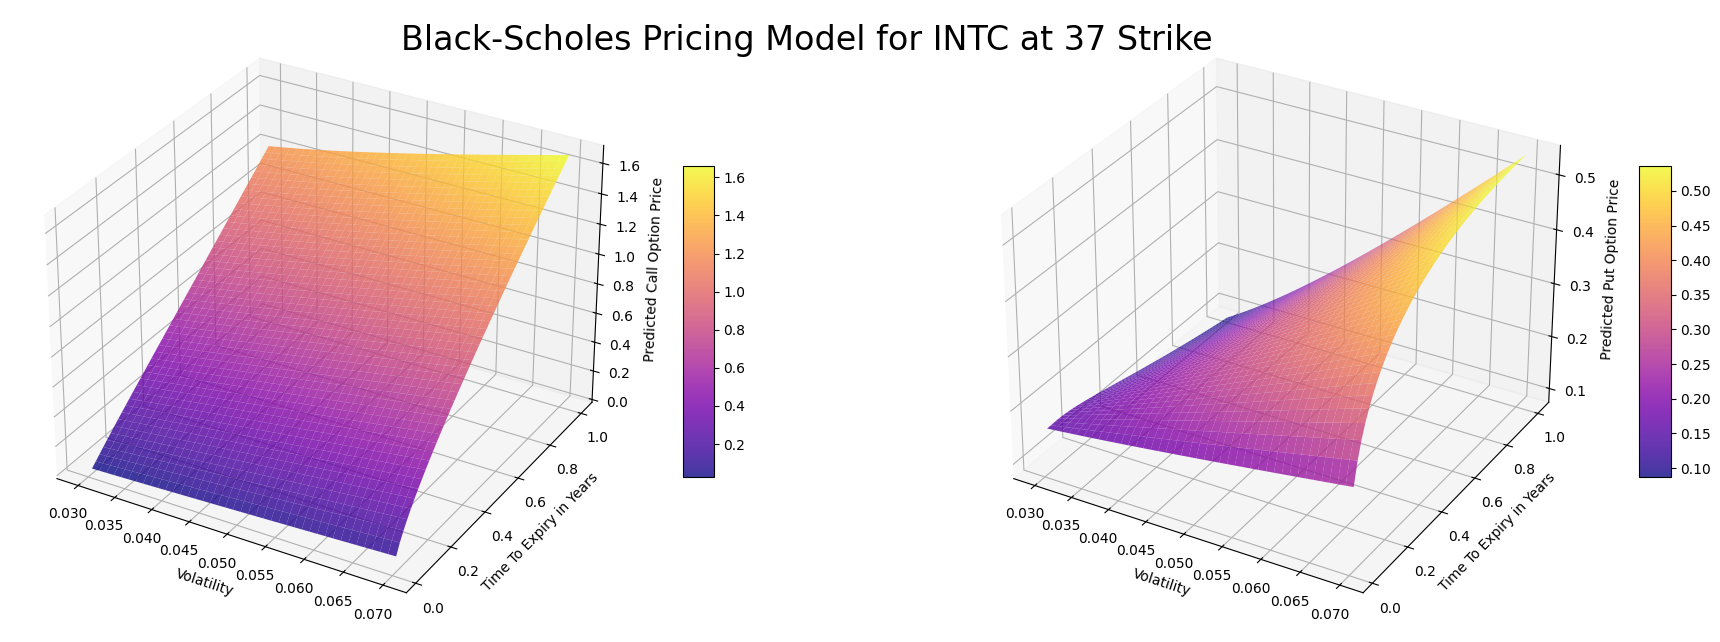

In [93]:
fig= plt.figure(figsize=(20, 7))
ax = fig.add_subplot(1, 2, 1, projection='3d')
surf = ax.plot_surface(VOL, TTE, bs_call_price, cmap='plasma', edgecolor='none', alpha=0.8)
ax.set_xlabel('Volatility')
ax.set_ylabel('Time To Expiry in Years')
ax.set_zlabel('Predicted Call Option Price')
fig.colorbar(surf, ax=ax, shrink=0.5, aspect=10)

ax2 = fig.add_subplot(1, 2, 2, projection='3d')
surf2 = ax2.plot_surface(VOL, TTE, bs_put_price, cmap='plasma', edgecolor='none', alpha=0.8)
ax2.set_xlabel('Volatility')
ax2.set_ylabel('Time To Expiry in Years')
ax2.set_zlabel('Predicted Put Option Price')
fig.suptitle("Black-Scholes Pricing Model for INTC at 37 Strike", fontsize=24, y=0.89)
fig.colorbar(surf2, ax=ax2, shrink=0.5, aspect=10)
plt.tight_layout()
plt.show()

In [55]:
strike = np.arange(35, 40.5, 0.5)
STR, TTE2 = np.meshgrid(strike, tte)
bs_call_price2, bs_put_price2 = black_scholes(UNDERLYING, STR, VOLATILITY, TTE2, RISK_FREE_RATE)

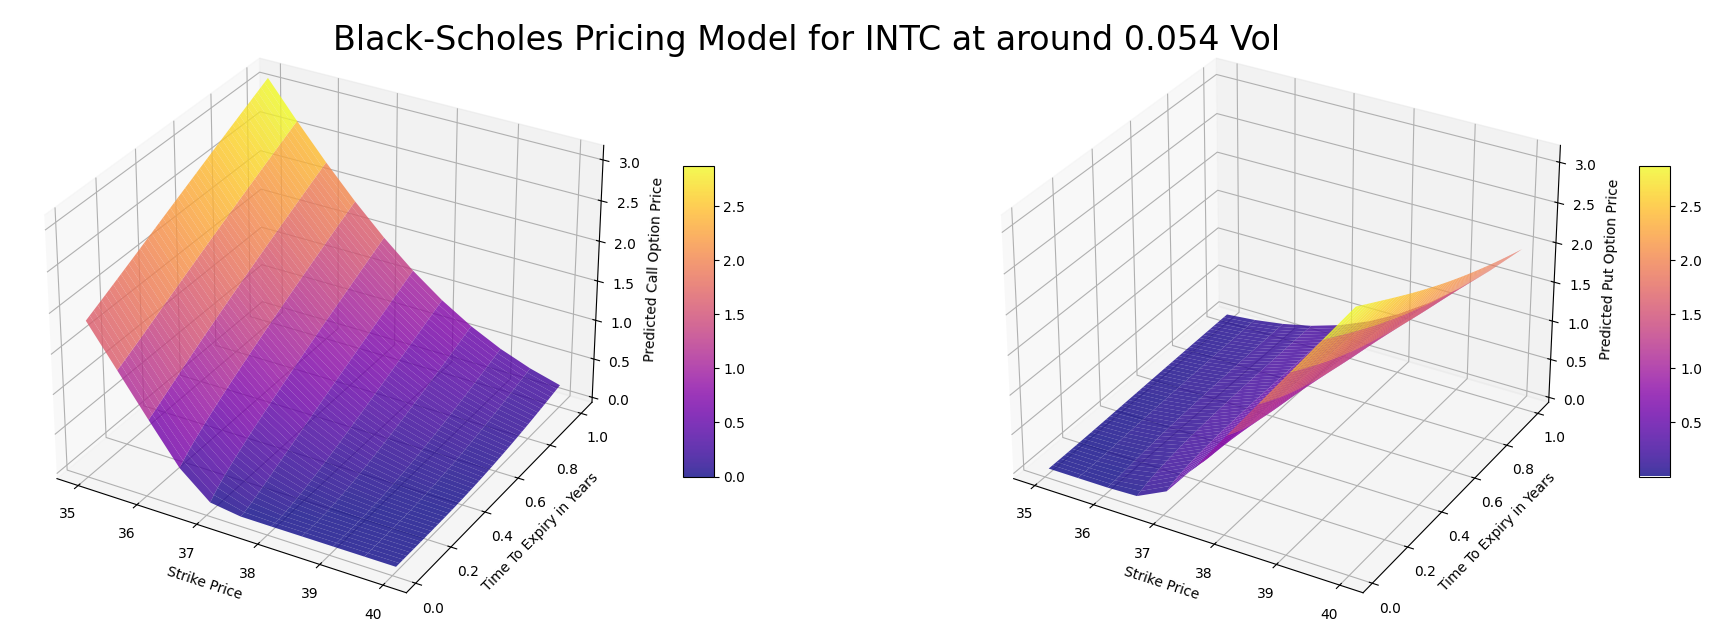

In [92]:
fig= plt.figure(figsize=(20, 7))
ax = fig.add_subplot(1, 2, 1, projection='3d')
surf = ax.plot_surface(STR, TTE2, bs_call_price2, cmap='plasma', edgecolor='none', alpha=0.8)
ax.set_xlabel('Strike Price')
ax.set_ylabel('Time To Expiry in Years')
ax.set_zlabel('Predicted Call Option Price')
fig.colorbar(surf, ax=ax, shrink=0.5, aspect=10)

ax2 = fig.add_subplot(1, 2, 2, projection='3d')
surf2 = ax2.plot_surface(STR, TTE2, bs_put_price2, cmap='plasma', edgecolor='none', alpha=0.8)
ax2.set_xlabel('Strike Price')
ax2.set_ylabel('Time To Expiry in Years')
ax2.set_zlabel('Predicted Put Option Price')
fig.colorbar(surf2, ax=ax2, shrink=0.5, aspect=10)
fig.suptitle("Black-Scholes Pricing Model for INTC at around 0.054 Vol", fontsize=24, y=0.89)
plt.tight_layout()
plt.show()

# Conclusions

The extrinsic value of options does not differ much up to 1 year of expiry, as the price of the options does not increase much with increasing TTE.

(Bring to lower part of notebook)

# Assumptions

Many assumptions are made for the Black-Scholes model. Firstly, the model assumes that the market consists of at least one risky asset (stock), and one riskless asset (cash / bond).

Assumptions about the assets are:

- The rate of return on the riskless asset is constant and called the risk-free interest rate
- The instantaneous log return of the stock price is an infinitesimal random walk with drift, following a geometric Brownian motion. The drift and volatility of the motion are constant.
- The stock does not pay a dividend.

Assumptions about the market are:
- The absence of any arbitrage opportunities
- The ability to borrow and lend any amount, even fractional, of the riskless asset at the riskless rate.
- The ability to buy and sell any amount, even fractional of the stock, including short selling.
- The absence of transcaction costs.